# Machine Learning with scikit-learn

# Preamble: Setup and Installation


In [7]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits() # Distributed with sklearn
mnist = datasets.fetch_mldata('MNIST original') # Requires internet access.


# What is machine learning?

    """[Machine learning is the] field of study that gives computers the ability to learn without being explicitly programmed."""
    
Arthur Samuel, 1959



We write code that looks like the following all the time. This is an example of a manually constructed decision tree, where the decisions at each stage in the branch are based explicitly on our knowledge of the system in question. For example if we're dealing with http requests we'll take different actions depending on the predefined response codes. If we're writing a fluid dynamics simulation the branches might depend on the properties of the fluid. We could even be handling the user input to our function.

Those examples are all systems where we already have a high degree of knowledge about the system and it's structure: our decisions are based on concrete rules. Machine learning as a field focuses on what we can do when instead of explicit knowledge of a system we only have example data. Instead of physical laws or a specification we have data. Machine learning is about going from the data to decisions in complex systems where the underlying structure is difficult or impossible to handle.

In this specific example we have a decision tree. Instead of a manually constructed decision tree based on some numbers on a website a machine learning approach would start with measurements of giraffes and some labels as to whether this was considered tall or short or average. The aim of a machine learning algorithm is to construct rules for classification based on only the input data. For example a decision tree algorithm aims to automatically construct a tree, deciding which variables to split on, which order to split them, and what the thresholds for each split are.


(You'll note that this could also be formulated as a statistical problem. The question of whether a giraffe is tall or not could be stated as looking at where the height of that giraffe falls in the distributions of heights of a sample.)


In [3]:
def classify_giraffe_height(height):
    """A simple heuristic decision tree for categorising a giraffe's height."""
    if height > 5.2:
        return 'Tall'
    elif height > 4.5:
        return 'Average'
    else:
        return 'Short'
    
# www.howtallisagiraffe.com

In [4]:
def classify_giraffe_height(height, gender):
    """A more complex decision tree for categorising a giraffe's height."""
    if gender == 'Male':
        if height > 5.2:
            return 'Tall'
        elif height > 4.3:
            return 'Average'
        else:
            return 'Short'
    elif gender == 'Female':
        if height > 4.3:
            return 'Tall'
        elif height > 3.5:
            return 'Average'
        else:
            return 'Short'
        
# www.howtallisagiraffe.com

# The machine learning landscape

Machine learning is a large field with many sub-domains and niches, focusing on either particular applications or particular techniques. In the course of this tutorial we're going to focus on one subset: supervised learning on batches of data. 

Other fields: unsupervised, reinforcement learning.

# Why scikit-learn?

Scikit-learn is a major part of the machine learning ecosystem in Python for many reasons. It aims to provide:

1. Solid implementations of fundamental machine learning algorithms (not cutting edge or experimental).
2. Central tools for validation, parameter tuning, evaluation metrics etc.
3. A lightweight object oriented API for building and extending machine learning pipelines.

# Approach to machine learning

Raw data --> Features --> Classifier --> Prediction



# The Digits Dataset

array([0, 1, 2, ..., 8, 9, 8])

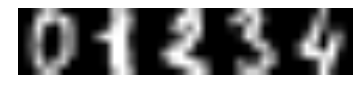

In [11]:
display_digits = np.hstack(digits['data'][:5].reshape((-1, 8, 8)))
plt.imshow(display_digits, cmap='gray', vmin=0, vmax=16)
plt.axis('off')

digit_values = digits['data']
digit_labels = digits['target']

digit_values.shape
digit_labels


In [16]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf.fit(digit_values, digit_labels)

clf.predict(digit_values[:5])

clf.score(digit_values, digit_labels)

1.0

In [145]:
digit_values = digits['data']
digit_labels = digits['target']

print("First row of the digits:")
print(type(digit_values), digit_values.shape)
print(digit_values[:1])
print()

print("The first five digit labels:")
print(type(digit_labels), digit_labels.shape)
print(digit_labels[:5])

# Talk about sklearn assumptions and internal API.


First row of the digits:
<class 'numpy.ndarray'> (1797, 64)
[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]]

The first five digit labels:
<class 'numpy.ndarray'> (1797,)
[0 1 2 3 4]


In [204]:
# Train a decision tree classifier to tell the digits apart

from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf.fit(digit_values, digit_labels)

print(clf.predict(digit_values)[:5])
print(clf.score(digit_values, digit_labels))
      

[0 1 2 3 4]
1.0


# Exercises
1. Investigate the methods and attributes of the classifier we just trained. 
2. The classifier we just trained has a score method which can be used to evaluate performance. Why is clf.score(x, y) not a good measure of performance? 

# Validating your model

You cannot use the training data to estimate the performance of your model!

In [28]:
from sklearn import cross_validation

from sklearn import linear_model, svm, ensemble, qda

clf = tree.DecisionTreeClassifier(max_depth=10)


print(np.mean(cross_validation.cross_val_score(clf, digit_values, digit_labels
                                      , cv=5)))

0.779852582343


In [205]:
from sklearn import cross_validation

print(np.mean(cross_validation.cross_val_score(clf, digits.data, digits.target, cv=5)))

cross_validator = cross_validation.KFold(len(digits.data), n_folds=10, shuffle=True)
print(np.mean(cross_validation.cross_val_score(clf, digits.data, digits.target, cv=cv)))

0.7876598573
0.78


# Exercises

Can you improve performance by:
1. Changing the parameters of the decision tree?
2. Using a different classifier?


# Choose the right metric

A highly accurate test for cancer in the general population in Australia:

    Do I have cancer?  -->  No.
    
[Cancer incidence statistics](https://canceraustralia.gov.au/affected-cancer/what-cancer/cancer-australia-statistics)

# Choosing parameters

In [32]:
from sklearn import linear_model
from sklearn import grid_search

param_grid = {"C": [1, 10, 100],
              "penalty": ['l1', 'l2']}

clf = linear_model.LogisticRegression()

parameter_clf = grid_search.GridSearchCV(estimator=clf,
                                         param_grid=param_grid,
                                         cv=5)
 parameter_clf.fit(digit_values, digit_labels)

cross_validation.cross_val_score(parameter_clf,digit_values, 
                                 digit_labels, cv=3)

parameter_clf.


array([ 0.8986711 ,  0.94490818,  0.90939597])

In [206]:
from sklearn import grid_search


param_grid = {"C": [1, 100, 10000],
              "penalty": ['l1', 'l2']}

base_clf = linear_model.LogisticRegression(tol=1e-1)

parameter_search_clf = grid_search.GridSearchCV(estimator=base_clf, param_grid=param_grid, cv=5)

print(cross_validation.cross_val_score(parameter_search_clf, digit_values, digit_labels, cv=5))
print(cross_validation.cross_val_score(parameter_search_clf, digit_values, digit_labels, cv=5))

parameter_search_clf.fit(digit_values, digit_labels)

# Examine the final parameters chosen.
print(parameter_search_clf.best_params_)


[ 0.92582418  0.89226519  0.94707521  0.96078431  0.89859155]
[ 0.92582418  0.88121547  0.92200557  0.96078431  0.89859155]
{'penalty': 'l2', 'C': 1}


# Exercises

1. We can just fit the parameter_search_clf directly, why not do that?

# Choosing a classifier

The bad news: there is no universal classifier (no free lunch theorem).

Machine learning is a pragmatic, data driven field:

The best classifier for your dataset is the classifier that works best on your dataset...

You can have a good hunch based on: problem domain, previous experience, features types etc. But if the classifier doesn't work you should ditch it and try something else.

Starting point: try out the linear classifiers, then random forest, then others. (computational cost, model complexity). If you have a large dataset you might be limited to linear classifiers anyway.

# Exercise

1. Find a better performing classifier/combination of parameters for the above dataset.
(You might like to subsample the training data while your experimenting with the parameters)

# The MNIST dataset


In [34]:
training_data = mnist.data[:60000]
testing_data = mnist.data[60000:]

training_labels = mnist.target[:60000]
testing_labels = mnist.target[60000:]

training_data.shape

(60000, 784)

In [ ]:
training_data = mnist.data[:60000]
testing_data = mnist.data[60000:]
training_labels = mnist.target[:60000]
testing_labels = mnist.target[60000:]

(-0.5, 27.5, 27.5, -0.5)

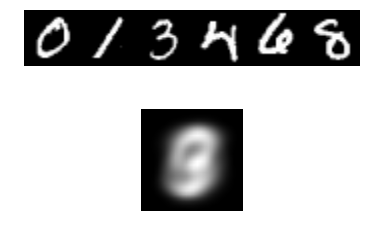

In [197]:
plt.subplot(2, 1, 1)
plt.imshow(np.hstack(training_data[::10000].reshape((-1, 28, 28))), cmap='gray')
plt.axis('off')
plt.subplot(2, 1, 2)
plt.imshow(np.mean(training_data, axis=0).reshape((28, 28)), cmap='gray')
plt.axis('off')

# Transformers and Pipelines

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

variable_reduction = PCA(n_components=30)
clf = linear_model.RidgeClassifier(tol=1e-1)

svm_pca_pipeline = Pipeline([('pca', variable_reduction),
                            ('ridge', clf)])

param_grid = {"ridge__alpha"}

svm_pca_pipeline.fit(training_data, training_labels)
print(svm_pca_pipeline.score(testing_data, testing_labels))

0.8301


Types of features depend on the input data... Text, images, complete emails.

Give examples in the notes of course, but don't talk about everything.

Be careful with categorical features: don't want them interpreted as continuous variables...
Need to use one hot encoding to transform into independant binary variables. (One hot encoder...)

In [1]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Now build a pipeline of results:
variable_reduction = PCA(n_components=30, whiten=True)
clf = LinearSVC(tol=0.5)

svm_pca_pipeline = Pipeline([('pca', variable_reduction), ('svc', clf)])

svm_pca_pipeline.fit(training_data, training_labels)
svm_pca_pipeline.score(testing_data, testing_labels)

NameError: name 'training_data' is not defined

# Validation with Pipelines

In [211]:
param_grid = {"svc__C": [1, 100],
              "pca__n_components": [10, 20]}

grid = grid_search.GridSearchCV(svm_pca_pipeline, param_grid, n_jobs=4)
grid.fit(training_data, training_labels)

print(grid.best_params_)


{'svc__C': 1, 'pca__n_components': 30}


# Other Performance Measures

In [216]:
from sklearn import metrics

grid.score(testing_data, testing_labels)

test_predictions = grid.predict(testing_data)
print(metrics.classification_report(testing_labels, test_predictions))
print(metrics.confusion_matrix(testing_labels, test_predictions))

             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94       980
        1.0       0.95      0.98      0.96      1135
        2.0       0.89      0.84      0.86      1032
        3.0       0.86      0.87      0.86      1010
        4.0       0.86      0.90      0.88       982
        5.0       0.83      0.77      0.80       892
        6.0       0.91      0.93      0.92       958
        7.0       0.90      0.90      0.90      1028
        8.0       0.85      0.82      0.84       974
        9.0       0.85      0.82      0.83      1009

avg / total       0.88      0.88      0.88     10000

[[ 958    0    2    2    1    5    9    1    2    0]
 [   0 1107    3    2    0    3    4    1   15    0]
 [  12   13  866   22   15    3   22   19   46   14]
 [   4    2   25  876    1   43    6   15   19   19]
 [   3    4    7    1  884    4   10    3   10   56]
 [  22    3    6   65   25  688   25    9   32   17]
 [  18    3    6    2   13   16  895    1  

# Exercise

1. Look at the classification report measures and try out other metrics included in sklearn.
2. How would you evaluate performance on a highly unbalanced dataset?

# Extending scikit-learn

Input Data --> Machine Learning --> Predictions

# Implementation notes

- The classifier object is the whole thing, reliant on pickle or joblib for persistence with all the concerns that implies
- scikit-learn doesn't (currently?) have good support for data interchange.

# Ethical Considerations

- An algorithm is only as unbiased as its training data...

# Deep Learning???


Input --> Features --> Features --> Features --> Features --> Features --> Output

- Differences from the previous diagram I showed of a typical machine learning architecture
- Typical modern network for images: 20 layers deep, 10's - 100's of millions of parameters (ie final model on the order of 400 MiB)

AlphaGo:

""" The final version of AlphaGo used 40 search threads, 48 CPUs, and 8 GPUs. We also implemented a distributed version of AlphaGo that exploited multiple machines, 40 search threads, 1,202 CPUs and 176 GPUs. """

http://www.nature.com/nature/journal/v529/n7587/full/nature16961.html

# Other Useful Stuff

- [PyCon-Au Talk by Chris Hausler from Zendesk](https://2015.pycon-au.org/schedule/30092/view_talk?day=friday)

# Contact

    sam@hames.id.au
    Twitter: @scmHames

These workshop notes will be on github, sometime.
https://github.com/samhames/
